In [10]:
import numpy as np
import torch
from torchvision import transforms
from torch.nn.functional import normalize
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import pyplot as plt

## Process data

In [3]:
train_images = []
for i in range(5):
    data = np.load(f"../data/raw/train_{i}.npz")
    [train_images.append(img) for img in data["images"]]

train_images = np.array(train_images)
# reshape to  (n_immgs, channels, pixels, pixels)
train_images = train_images.reshape(train_images.shape[0], 1, 28, 28)
train_images = torch.from_numpy(train_images).type(torch.float32)
train_images.shape

torch.Size([25000, 1, 28, 28])

In [4]:
# Normalize
for idx, image in enumerate(train_images):
    mean = image.mean().item()
    std = image.std().item()

    transform_norm = transforms.Compose([
        transforms.Normalize(mean, std)
    ])

    img_normalized = transform_norm(image)

    train_images[idx] = img_normalized



In [9]:
train_images[5004].std()

tensor(1.)

## Load data

In [15]:
images = torch.load("../data/processed/images.pt")
labels = torch.load("../data/processed/labels.pt")

train_dataset = TensorDataset(images, labels)  # create your datset
train_loader = DataLoader(
    train_dataset, batch_size=64, shuffle=True
)  # create your dataloader

tensor(9)


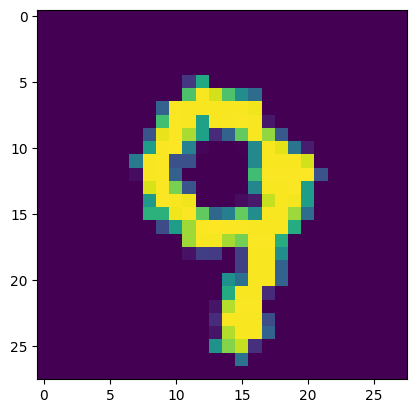

tensor(7)


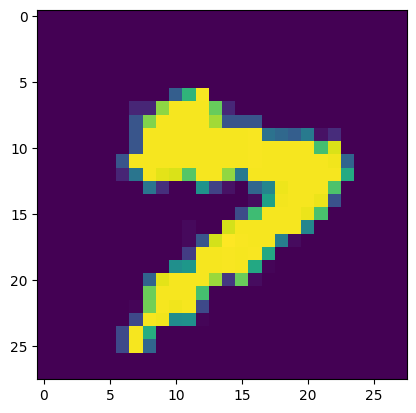

tensor(2)


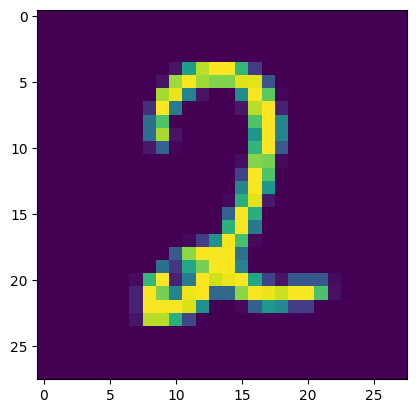

tensor(7)


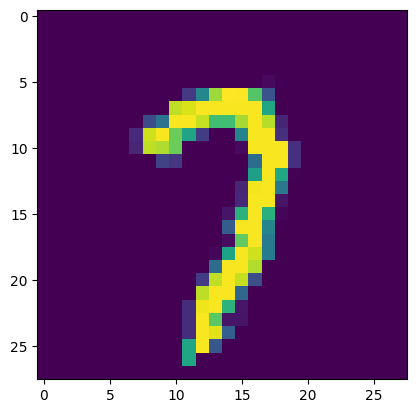

tensor(1)


In [18]:
i=0
for images, labels in train_loader:
        i+=1

        print(labels[0])

        if i >= 5: break
        images = images.reshape(64, 28,28)
        plt.imshow(images[0], interpolation='nearest')
        plt.show()